In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## The Data

 In the table is the average consumption of 17 types of food in grams per person per week for every country in the UK.

The table shows some interesting variations across different food types, but overall differences aren't so notable. 



In [8]:
df = pd.read_csv("UK_foods.csv",index_col="Unnamed: 0")

In [9]:
df.head()

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209


In [12]:
# transposing the dataframe

In [15]:
df = df.T
df

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


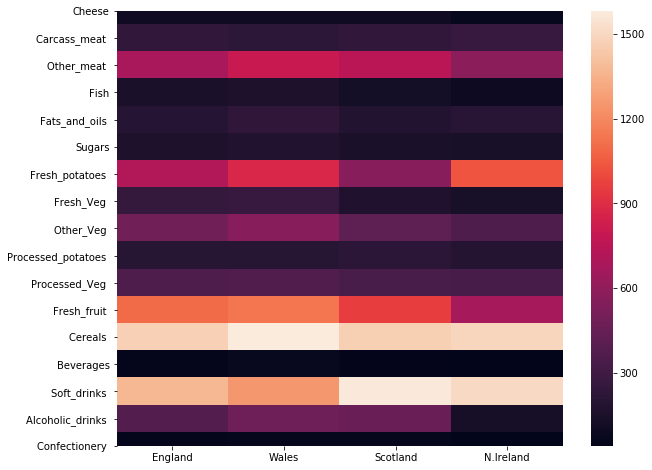

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.T)

In [19]:
df.shape

(4, 17)

### Building an autoencoder

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import SGD

In [40]:
encoder = Sequential()
encoder.add(Dense(8,activation='relu',input_shape=[17]))
encoder.add(Dense(4,activation='relu'))
encoder.add(Dense(2,activation='relu'))

In [41]:
decoder = Sequential()
decoder.add(Dense(4,activation='relu',input_shape=[2]))
decoder.add(Dense(8,activation='relu'))
decoder.add(Dense(17,activation='relu'))

In [42]:
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(optimizer=SGD(lr=1.5),loss='mse',
                   metrics=['accuracy'])

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [45]:
scaled_data.shape

(4, 17)

In [46]:
autoencoder.fit(scaled_data,scaled_data,epochs=15)

Train on 4 samples
Epoch 1/15
4/4 [==============================] - 2s 588ms/sample - loss: 0.4222 - accuracy: 0.0000e+00
Epoch 2/15
4/4 [==============================] - 0s 2ms/sample - loss: 0.3623 - accuracy: 0.2500
Epoch 3/15
4/4 [==============================] - 0s 3ms/sample - loss: 0.3347 - accuracy: 0.2500
Epoch 4/15
4/4 [==============================] - 0s 3ms/sample - loss: 0.3250 - accuracy: 0.0000e+00
Epoch 5/15
4/4 [==============================] - 0s 2ms/sample - loss: 0.3194 - accuracy: 0.0000e+00
Epoch 6/15
4/4 [==============================] - 0s 2ms/sample - loss: 0.3171 - accuracy: 0.0000e+00
Epoch 7/15
4/4 [==============================] - 0s 3ms/sample - loss: 0.3160 - accuracy: 0.0000e+00
Epoch 8/15
4/4 [==============================] - 0s 3ms/sample - loss: 0.3154 - accuracy: 0.0000e+00
Epoch 9/15
4/4 [==============================] - 0s 3ms/sample - loss: 0.3148 - accuracy: 0.0000e+00
Epoch 10/15
4/4 [==============================] - 0s 2ms/sample - lo

In [53]:
encoded_2d_data = encoder.predict(scaled_data)

In [52]:
df.index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [56]:
new_df = pd.DataFrame(encoded_2d_data,index=df.index,columns=["c1","c2"])

In [64]:
new_df['index'] = df.index
new_df

,c1,c2,index
England,0.530337,0.0,England
Wales,0.773829,0.0,Wales
Scotland,0.460953,0.0,Scotland
N.Ireland,0.322093,0.0,N.Ireland


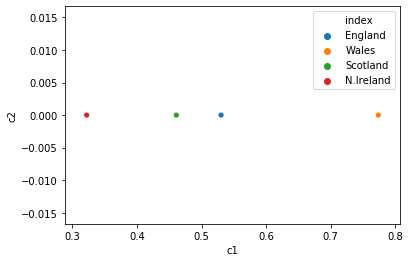

In [66]:
sns.scatterplot(x="c1",y="c2",data=new_df,hue='index')